In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn import tree
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline

In [3]:
pd.options.display.max_columns = 999

In [4]:
data = pd.read_csv('HR_Employee_Attrition_Data.csv')

In [5]:
data.shape

(2940, 35)

In [6]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
data.Age.value_counts()

35    156
34    154
36    138
31    138
29    136
32    122
30    120
38    116
33    116
40    114
37    100
27     96
28     96
42     92
39     84
45     82
41     80
26     78
44     66
46     66
43     64
50     60
24     52
25     52
47     48
49     48
55     44
48     38
51     38
53     38
54     36
52     36
22     32
56     28
58     28
23     28
21     26
20     22
59     20
19     18
18     16
60     10
57      8
Name: Age, dtype: int64

In [8]:
data.Attrition = data.Attrition.map({'Yes':1, 'No':0})

In [9]:
data.Attrition.value_counts()

0    2466
1     474
Name: Attrition, dtype: int64

In [10]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
data.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [12]:
obj_cols = data.dtypes[data.dtypes == 'object'].index

In [13]:
for cols in obj_cols:
    data = data.join(pd.get_dummies(data[cols], prefix=cols).iloc[:,:-1])

In [14]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,Department_Human Resources,Department_Research & Development,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,Gender_Female,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,MaritalStatus_Divorced,MaritalStatus_Married,OverTime_No
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1


In [15]:
data_new = data.drop(obj_cols, axis=1)

In [16]:
data_new.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,Department_Human Resources,Department_Research & Development,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,Gender_Female,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,MaritalStatus_Divorced,MaritalStatus_Married,OverTime_No
0,41,1,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,49,0,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
2,37,1,1373,2,2,1,3,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,33,0,1392,3,4,1,4,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,5,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1


In [17]:
x = data_new.drop('Attrition', axis=1)
y = data_new['Attrition']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

## Feature Selection

In [19]:
rndf = RandomForestClassifier(n_estimators=150)

In [20]:
rndf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
importance = pd.DataFrame.from_dict({'cols':x_train.columns, 'importance': rndf.feature_importances_})

In [22]:
importance = importance.sort_values(by='importance', ascending=False)

In [23]:
import seaborn as sns

In [24]:
%matplotlib inline

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text xticklabel objects>)

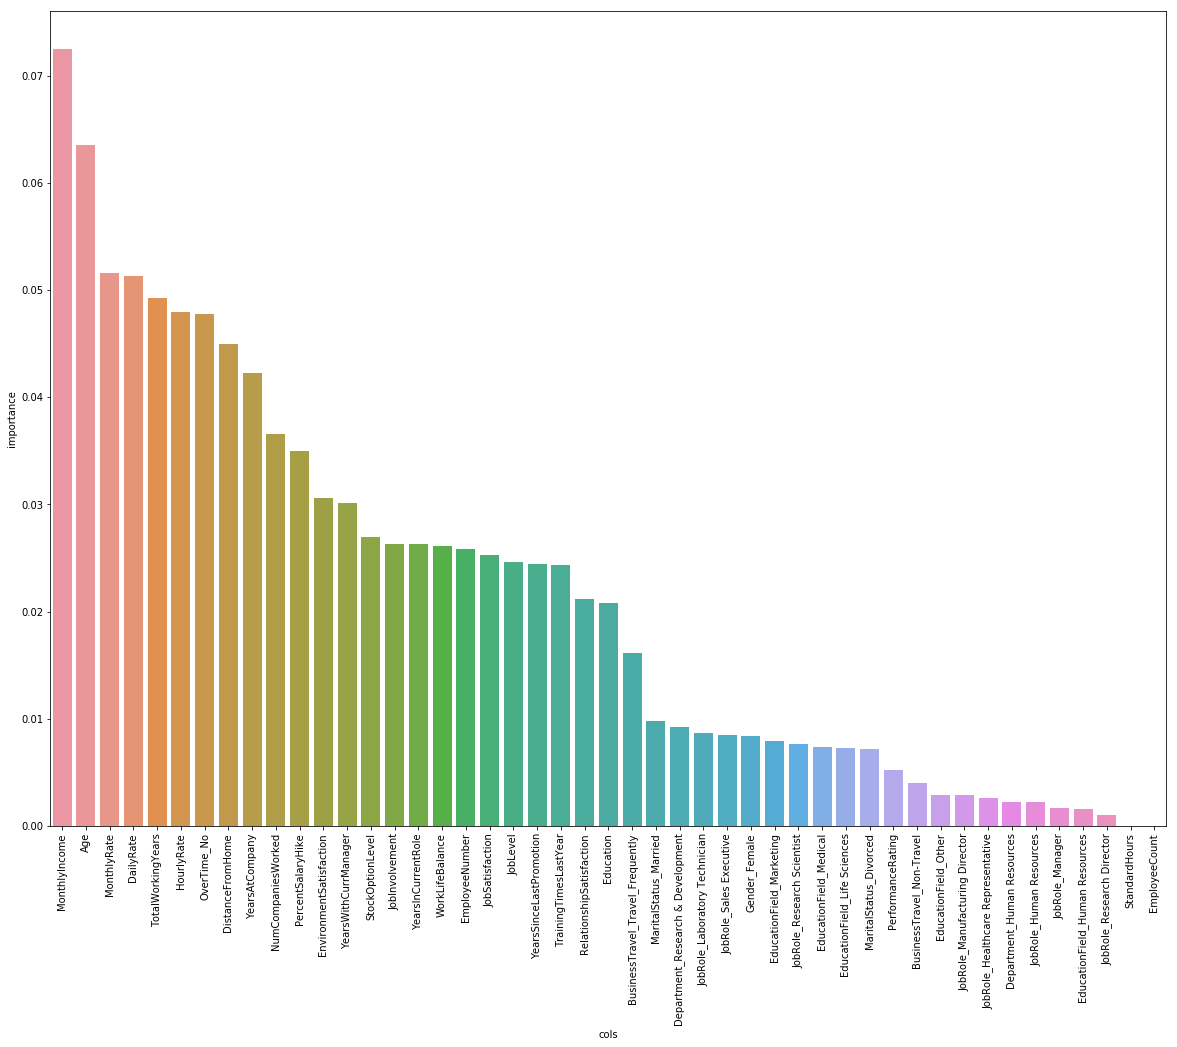

In [25]:
plt.figure(figsize=(20,15))
sns.barplot(importance.cols, importance.importance)
plt.xticks(rotation=90)

In [55]:
imp_cols = importance[importance.importance >= 0.005].cols.values

In [56]:
imp_cols

array(['MonthlyIncome', 'Age', 'MonthlyRate', 'DailyRate',
       'TotalWorkingYears', 'HourlyRate', 'OverTime_No',
       'DistanceFromHome', 'YearsAtCompany', 'NumCompaniesWorked',
       'PercentSalaryHike', 'EnvironmentSatisfaction',
       'YearsWithCurrManager', 'StockOptionLevel', 'JobInvolvement',
       'YearsInCurrentRole', 'WorkLifeBalance', 'EmployeeNumber',
       'JobSatisfaction', 'JobLevel', 'YearsSinceLastPromotion',
       'TrainingTimesLastYear', 'RelationshipSatisfaction', 'Education',
       'BusinessTravel_Travel_Frequently', 'MaritalStatus_Married',
       'Department_Research & Development',
       'JobRole_Laboratory Technician', 'JobRole_Sales Executive',
       'Gender_Female', 'EducationField_Marketing',
       'JobRole_Research Scientist', 'EducationField_Medical',
       'EducationField_Life Sciences', 'MaritalStatus_Divorced',
       'PerformanceRating'], dtype=object)

# Model Selection

In [57]:
names = ["Decision Tree", "Random Forest", "AdaBoost", "Logisic", "GBM"]

In [58]:
classifiers = [
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(n_estimators=100),
    LogisticRegression(),
    GradientBoostingClassifier(n_estimators=100)]

In [59]:
for clf in zip(names, classifiers):
    clf[1].fit(x_train[imp_cols], y_train) #[imp_cols]
    print(clf[0], clf[1].score(x_test[imp_cols], y_test)) #[imp_cols]

Decision Tree 0.8639455782312925
Random Forest 0.9693877551020408
AdaBoost 0.9030612244897959
Logisic 0.8809523809523809
GBM 0.9251700680272109


In [60]:
# Rushi's output
#Decision Tree 0.867346938776
#Random Forest 0.955782312925
#AdaBoost 0.886054421769
#Logisic 0.884353741497
#GBM 0.91156462585

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

In [63]:
for clf in zip(names, classifiers):
    print(clf[0])
    pred = clf[1].predict(x_test[imp_cols])# [imp_cols]
    print(confusion_matrix(pred, y_test))
    print(classification_report(pred, y_test)) 
    print('*'*20)

Decision Tree
[[474  57]
 [ 23  34]]
             precision    recall  f1-score   support

          0       0.95      0.89      0.92       531
          1       0.37      0.60      0.46        57

avg / total       0.90      0.86      0.88       588

********************
Random Forest
[[497  18]
 [  0  73]]
             precision    recall  f1-score   support

          0       1.00      0.97      0.98       515
          1       0.80      1.00      0.89        73

avg / total       0.98      0.97      0.97       588

********************
AdaBoost
[[487  47]
 [ 10  44]]
             precision    recall  f1-score   support

          0       0.98      0.91      0.94       534
          1       0.48      0.81      0.61        54

avg / total       0.93      0.90      0.91       588

********************
Logisic
[[489  62]
 [  8  29]]
             precision    recall  f1-score   support

          0       0.98      0.89      0.93       551
          1       0.32      0.78      0.45      

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
from scipy.stats import randint as sp_randint

## Random Search CV

In [67]:
param_dist = {"max_depth": [5, None],
              #"max_features": sp_randint(2, 11),
              "n_estimators": sp_randint(50, 150),
              "min_samples_split": sp_randint(2, 6),
              "min_samples_leaf": sp_randint(1, 6),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]
             }

In [68]:
rscv = RandomizedSearchCV(classifiers[1], param_distributions=param_dist, n_iter=10, verbose=1)

In [69]:
rscv.fit(x_train[imp_cols], y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    5.2s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': [5, None], 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022652CE2390>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022652CE2E80>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022652CEE2B0>, 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state

In [70]:
rscv.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 55}

In [71]:
y_test_pred = rscv.predict(x_test[imp_cols])

In [72]:
rscv.score(x_test[imp_cols], y_test)

0.9778911564625851

## Grid Search CV

In [73]:
param_dist = {"max_depth": [5, None],
              #"max_features": sp_randint(2, 11),
              "n_estimators": [50, 100, 150],
              "min_samples_split": [2, 3, 4, 5],
              "min_samples_leaf": [2,3,4,5,6]
             }

In [74]:
rscv_grid = GridSearchCV(classifiers[1], param_grid=param_dist, verbose=1)

In [75]:
rscv_grid.fit(x_train[imp_cols], y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.1min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, None], 'n_estimators': [50, 100, 150], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [76]:
rscv_grid.best_params_

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [77]:
model = rscv_grid.best_estimator_
model.fit(x_train[imp_cols], y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [78]:
model.score(x_test[imp_cols], y_test)

0.9302721088435374

## Lift Gain and KS Statistics

In [79]:
predict_probas = rscv.predict_proba(x_test[imp_cols])
y_test_pred = rscv.predict(x_test[imp_cols])

In [80]:
predict_probas

array([[0.96363636, 0.03636364],
       [0.98181818, 0.01818182],
       [0.27575758, 0.72424242],
       ...,
       [0.98787879, 0.01212121],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [81]:
new_df = pd.DataFrame.from_dict({'target': y_test,'predict':y_test_pred, 'pred_prob_0':predict_probas[:,0], 'pred_prob_1': predict_probas[:,1]})

In [82]:
new_df

,target,predict,pred_prob_0,pred_prob_1
1202,0,0,0.963636,0.036364
268,0,0,0.981818,0.018182
1365,1,1,0.275758,0.724242
45,1,1,0.209091,0.790909
1650,0,0,0.963636,0.036364
464,0,0,1.000000,0.000000
482,1,1,0.145455,0.854545
2101,0,0,0.918182,0.081818
919,0,0,0.927273,0.072727
626,0,0,1.000000,0.000000


In [83]:
new_df = new_df.sort_values(by='pred_prob_1', ascending=False)

In [84]:
splits = np.array_split(new_df.values, 10)

In [85]:
ks_df = pd.DataFrame(columns=['count', '1s', '0s', 'pos_per', 'neg_per'])

In [86]:
list_of_dict = []

In [87]:
for split in splits:
    cnt = split.shape[0]
    pred_target_pos = split[:,3].sum()
    pred_target_neg = cnt - pred_target_pos
    pos_per = pred_target_pos / cnt
    neg_per = pred_target_neg / cnt
    list_of_dict.append({'count': cnt, '1s': pred_target_pos, '0s': pred_target_neg, 'pos_per': pos_per, 'neg_per': neg_per})

In [88]:
metric_data = pd.DataFrame.from_dict(list_of_dict)

In [89]:
metric_data

,0s,1s,count,neg_per,pos_per
0,5.872727,53.127273,59,0.099538,0.900462
1,34.269697,24.730303,59,0.580842,0.419158
2,52.881818,6.118182,59,0.896302,0.103698
3,56.200000,2.800000,59,0.952542,0.047458
4,57.172727,1.827273,59,0.969029,0.030971
5,57.745455,1.254545,59,0.978737,0.021263
6,58.124242,0.875758,59,0.985157,0.014843
7,58.509091,0.490909,59,0.991680,0.008320
8,58.000000,0.000000,58,1.000000,0.000000
9,58.000000,0.000000,58,1.000000,0.000000


In [90]:
metric_data['0s_cumsum'] = metric_data['0s'].cumsum()
metric_data['1s_cumsum'] = metric_data['1s'].cumsum()
metric_data['0s_cumsum_per'] = metric_data['0s_cumsum'] / metric_data['0s'].sum()
metric_data['1s_cumsum_per'] = metric_data['1s_cumsum'] / metric_data['1s'].sum()
metric_data['cum_pop_%'] = (metric_data.index + 1) * 10

In [91]:
metric_data['lift_decile'] = 1000 * metric_data['1s'] / metric_data['1s'].sum()
metric_data['lift_total'] = 10000 * metric_data['1s_cumsum_per'] / metric_data['cum_pop_%']
metric_data['ks'] = metric_data['1s_cumsum_per'] - metric_data['0s_cumsum_per']

In [92]:
metric_data

,0s,1s,count,neg_per,pos_per,0s_cumsum,1s_cumsum,0s_cumsum_per,1s_cumsum_per,cum_pop_%,lift_decile,lift_total,ks
0,5.872727,53.127273,59,0.099538,0.900462,5.872727,53.127273,0.011822,0.582381,10,582.381079,582.381079,5.705594e-01
1,34.269697,24.730303,59,0.580842,0.419158,40.142424,77.857576,0.080806,0.853475,20,271.093542,426.737311,7.726687e-01
2,52.881818,6.118182,59,0.896302,0.103698,93.024242,83.975758,0.187256,0.920542,30,67.067499,306.847374,7.332861e-01
3,56.200000,2.800000,59,0.952542,0.047458,149.224242,86.775758,0.300386,0.951236,40,30.693596,237.808929,6.508502e-01
4,57.172727,1.827273,59,0.969029,0.030971,206.396970,88.603030,0.415473,0.971266,50,20.030561,194.253255,5.557932e-01
5,57.745455,1.254545,59,0.978737,0.021263,264.142424,89.857576,0.531714,0.985019,60,13.752325,164.169767,4.533050e-01
6,58.124242,0.875758,59,0.985157,0.014843,322.266667,90.733333,0.648717,0.994619,70,9.600053,142.088379,3.459021e-01
7,58.509091,0.490909,59,0.991680,0.008320,380.775758,91.224242,0.766494,1.000000,80,5.381345,125.000000,2.335058e-01
8,58.000000,0.000000,58,1.000000,0.000000,438.775758,91.224242,0.883247,1.000000,90,0.000000,111.111111,1.167529e-01
9,58.000000,0.000000,58,1.000000,0.000000,496.775758,91.224242,1.000000,1.000000,100,0.000000,100.000000,-1.110223e-16


Text(0,0.5,'ks')

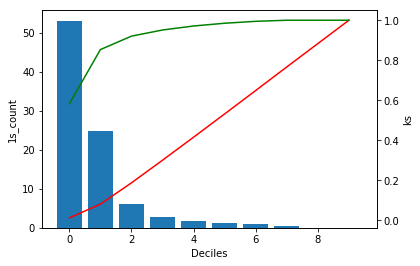

In [93]:
fig, ax1 = plt.subplots()

ax1.bar(metric_data.index, metric_data['1s'])
ax1.set_ylabel('1s_count')
ax1.set_xlabel('Deciles')
ax2 = ax1.twinx()

ax2.plot(metric_data['0s_cumsum_per'], color='red')
ax2.plot(metric_data['1s_cumsum_per'], color='green')
ax2.set_ylabel('ks')